# Validation Set Creation for VAD/ Noise Reduction Experiments

- this notebook creates validation set for experimenting the effect of VAD/Noise reduction for forced alignments.

## Selection Process
- Randomly select sentence audio segments from `CHILDES/Gleason` dataset.
- Pick 5 children segment & 5 adult segment from each convo. Since there are 22 (`Father` category), 1 (`Mother` category) 13 (`Dinner` category) convos, there will be 360 (36x5x2) convos. 
- We call 180 child segments as `child_valid`, and 180 adult segments as `adult_valid`. Although we are focusing on child word detection, I am curious to see the performance on the adult dataset as well for future purpose.

## Model Comparison

1. VAD(sensitivity 2)
2. VAD(sensitivity 3)
3. VAD(sensitivity 2) + Noise Reduction (Median)
4. VAD(sensitivity 3) + Noise Reduction (Median)
5. VAD(sensitivity 2) + Noise Reduction (MFCC UP)
6. VAD(sensitivity 3) + Noise Reduction (MFCC UP)

two noise reduction methods (Median, MFCC UP) were chosen manually after comparing the performance on few samples.

## Evaluation Metric

The accuracy of forced alginment on each sample will be evaluated by humans. To make annotation easier, I will use these approximated score metric.

- 2: Good (All alignments match)
- 1: Acceptable (more than 2/3 of the alignments are correct)
- 0: Bad (otherwise)

if the annotation is a single word, check if the silence/noise is removed appropriately and the segment of that word is inside.


In [1]:
import os
import random

import IPython.display as ipd

In [2]:
random.seed(17)

In [3]:
base_path = "scraping_and_segmentation/Audio_Data/CHILDES/Eng-NA/Gleason/%s"
categories = ["Dinner", "Father", "Mother"]

In [4]:
valid_path = []
for cat in categories:
    for d in os.listdir(base_path % cat):
        # check if the path has the folder 'wav'
        path = (base_path + "/%s/wav/") % (cat, d)
        if os.path.isdir(path):
            valid_path.append(path[:-4]) # remove 'wav' from path
        else:
            print(path)
len(valid_path)

scraping_and_segmentation/Audio_Data/CHILDES/Eng-NA/Gleason/Dinner/victor/wav/
scraping_and_segmentation/Audio_Data/CHILDES/Eng-NA/Gleason/Dinner/william/wav/
scraping_and_segmentation/Audio_Data/CHILDES/Eng-NA/Gleason/Dinner/.DS_Store/wav/
scraping_and_segmentation/Audio_Data/CHILDES/Eng-NA/Gleason/Dinner/theresa/wav/
scraping_and_segmentation/Audio_Data/CHILDES/Eng-NA/Gleason/Dinner/frank/wav/
scraping_and_segmentation/Audio_Data/CHILDES/Eng-NA/Gleason/Dinner/wanda/wav/
scraping_and_segmentation/Audio_Data/CHILDES/Eng-NA/Gleason/Dinner/patricia/wav/
scraping_and_segmentation/Audio_Data/CHILDES/Eng-NA/Gleason/Dinner/susan/wav/
scraping_and_segmentation/Audio_Data/CHILDES/Eng-NA/Gleason/Dinner/xavia/wav/
scraping_and_segmentation/Audio_Data/CHILDES/Eng-NA/Gleason/Father/.DS_Store/wav/


36

In [5]:
from utils import load_transcription_file

def select_candidates(_texts, n=5):
    child = list(filter(lambda x: x[1] == "CHI", _texts))
    adult = list(filter(lambda x: x[1] != "CHI", _texts))

    print("Out of %s child's sentences, randomly selecting %s." 
          % (len(child), n))
    print("Out of %s adult's sentences, randomly selecting %s." 
      % (len(adult), n))
    return sample_text(child, n), sample_text(adult, n)

def sample_text(_texts, n):
    samples = []
    while len(samples) < n:
        s = random.choice(_texts)
        if len(s[2]) > 0 and s[2] != "aa":
            samples.append(s)
    return samples

def find_file_path(path, _id):
    files = os.listdir(path + "wav")
    for i, f in enumerate(files):
        if f.endswith(".wav"):
            if int(f.split("_")[1]) == _id:
                return path + "wav/" + files[i]
    return None

In [6]:
child_samples = []
adult_samples = []
for path in valid_path:
    texts = load_transcription_file(path)
    _child_samples, _adult_samples = select_candidates(texts)
    for _id, _, s in _child_samples:
        f = find_file_path(path, _id)
        child_samples.append((f, s))
    for _id, _, s in _adult_samples:
        f = find_file_path(path, _id)
        adult_samples.append((f, s))
len(child_samples), len(adult_samples)


Loading scraping_and_segmentation/Audio_Data/CHILDES/Eng-NA/Gleason/Dinner/isadora/sentence_text.txt
Out of 134 child's sentences, randomly selecting 5.
Out of 256 adult's sentences, randomly selecting 5.

Loading scraping_and_segmentation/Audio_Data/CHILDES/Eng-NA/Gleason/Dinner/martin/sentence_text.txt
Out of 370 child's sentences, randomly selecting 5.
Out of 824 adult's sentences, randomly selecting 5.

Loading scraping_and_segmentation/Audio_Data/CHILDES/Eng-NA/Gleason/Dinner/guy/sentence_text.txt
Out of 143 child's sentences, randomly selecting 5.
Out of 396 adult's sentences, randomly selecting 5.

Loading scraping_and_segmentation/Audio_Data/CHILDES/Eng-NA/Gleason/Dinner/laurel/sentence_text.txt
Out of 226 child's sentences, randomly selecting 5.
Out of 383 adult's sentences, randomly selecting 5.

Loading scraping_and_segmentation/Audio_Data/CHILDES/Eng-NA/Gleason/Dinner/andy/sentence_text.txt
Out of 209 child's sentences, randomly selecting 5.
Out of 232 adult's sentences, r

(180, 180)

In [7]:
child_samples[:4]

[('scraping_and_segmentation/Audio_Data/CHILDES/Eng-NA/Gleason/Dinner/isadora/wav/id_387_789847_to_791542.wav',
  'good shot'),
 ('scraping_and_segmentation/Audio_Data/CHILDES/Eng-NA/Gleason/Dinner/isadora/wav/id_323_680429_to_684469.wav',
  'i do aa'),
 ('scraping_and_segmentation/Audio_Data/CHILDES/Eng-NA/Gleason/Dinner/isadora/wav/id_255_563004_to_564482.wav',
  'ill choose'),
 ('scraping_and_segmentation/Audio_Data/CHILDES/Eng-NA/Gleason/Dinner/isadora/wav/id_297_629275_to_633095.wav',
  'i want')]

In [63]:
f, s = random.choice(child_samples)
print(s)
ipd.Audio(f)

do you wanna eat it mixed into these


In [64]:
f, s = random.choice(adult_samples)
print(s)
ipd.Audio(f)

she tells everybody


In [10]:
with open("validation/child_valid.tsv", "w") as f1:
    f1.write("%s\t%s\n" % ("file_path", "annotation"))
    for f, s in child_samples:
        f1.write("%s\t%s\n" % (f, s))

with open("validation/adult_valid.tsv", "w") as f2:
    f2.write("%s\t%s\n" % ("file_path", "annotation"))
    for f, s in adult_samples:
        f2.write("%s\t%s\n" % (f, s))

## analysis of the valid set

In [11]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

In [12]:
_, child_s = zip(*child_samples)
_, adult_s = zip(*adult_samples)

## Lengths

In [13]:
child_lengths = [len(s.split()) for s in child_s]
adult_lengths = [len(s.split()) for s in adult_s]

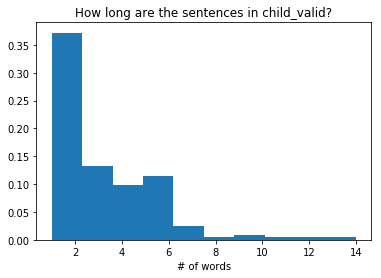

In [14]:
plt.title("How long are the sentences in child_valid?")
plt.hist(child_lengths, density=True)
plt.xlabel('# of words');

35% are single words!

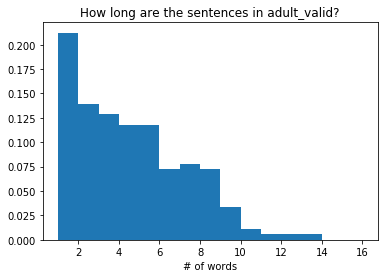

In [15]:
plt.title("How long are the sentences in adult_valid?")
plt.hist(adult_lengths, density=True, bins=range(min(adult_lengths), max(adult_lengths)))
plt.xlabel('# of words');

20+% are single words for adults, but tend to have longer sentences

### What is the most common words

#### Child
Most common words

In [16]:
words = []
for s in child_s:
    words += s.split()
Counter(words).most_common(10)

[('i', 31),
 ('yeah', 23),
 ('the', 16),
 ('and', 15),
 ('aa', 14),
 ('it', 12),
 ('is', 11),
 ('want', 10),
 ('down', 9),
 ('this', 9)]

Most common single words

In [17]:
single_words = filter(lambda x: len(x) == 1, [s.split() for s in child_s])
single_words = [s[0] for s in single_words]
Counter(single_words).most_common(5)

[('yeah', 16), ('no', 7), ('what', 6), ('okay', 3), ('mm', 2)]

#### Adults

In [18]:
words = []
for s in adult_s:
    words += s.split()
Counter(words).most_common(10)

[('you', 32),
 ('the', 27),
 ('it', 20),
 ('and', 18),
 ('that', 15),
 ('this', 13),
 ('to', 12),
 ('okay', 12),
 ('here', 11),
 ('on', 11)]

In [19]:
single_words = filter(lambda x: len(x) == 1, [s.split() for s in adult_s])
single_words = [s[0] for s in single_words]
Counter(single_words).most_common(5)

[('okay', 5), ('yeah', 4), ('no', 3), ('right', 3), ('oh', 2)]